# ML Intro

A notebook to show basic machine learning concepts.
Execute cells in order.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mim
from ML_functions import gradient_descent, plot_error_surface, supermodel, split_train_test
import seaborn as sns
sns.set_context('talk')

## ML problems

Problems in ML can be coarsely categorized in:

### Regression
Predict a continuous valued function.

### Classification
Predict a discrete valued function.

### Clustering
Group data according to some sort of similarity.

### Dimensionality reduction
Represent data in a new space with less dimensions than original space.

<img src="files/MachineLearningDiagram.png" width="804" height="628">

## Supervised  learning
Supervised learning implies the minimization of an error function.
Assuming a linear model in the form $y=w_0 + w_1 x$ and a mean squared error function $\sum_n^N (y_n-t_n)^2/2N$, let's have a look at the error function over the value of the two parameters (we represent the surface of log Error for better visualization as contour lines).

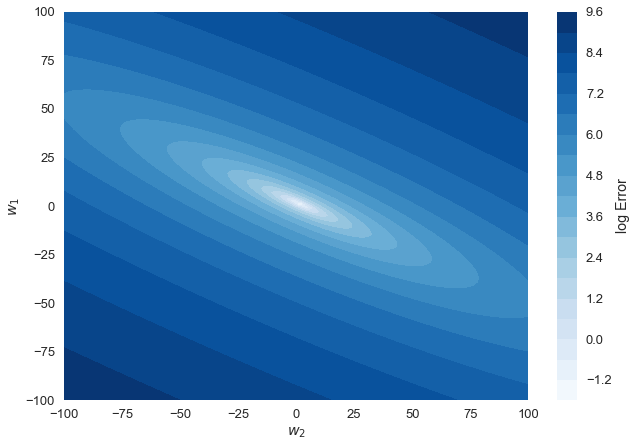

In [12]:
# Create a synthetic dataset
num_samples = 20  # number of data points
x = np.random.rand(num_samples)  # independent variable
noise = np.random.randn(num_samples) * .5  # noise
t = x * 2 + 1 + noise  # dependent variable (tutor)

# Visualize error surface over the two parameters w_0 and w_1
x1 = np.stack([np.ones([num_samples]), x])  # add an additional element to x (fixed at 1) to deal with bias
wmin = plot_error_surface(x1, t)
plt.show()

## Gradient descent
Iterative procedure to minimize an error function.
The idea: the gradient of the error function points in the direction of largest slope of the function; so, starting at a random position in parameters space and iteratively changing parameters value in the direction of the negative gradient is going to reduce the error function at each step of iteration.
You can run the following cell multiple times and see the first 10 steps of gradient descent starting at different random position. The red arrows represent the negative gradient at each step. Sometimes the procedure can overshoot and actually increase the error from one step to the other. In order to avoid this case the gradient is usually multiplied by a small value $\eta$. Here $\eta$ is $1$ for ease of visualization.

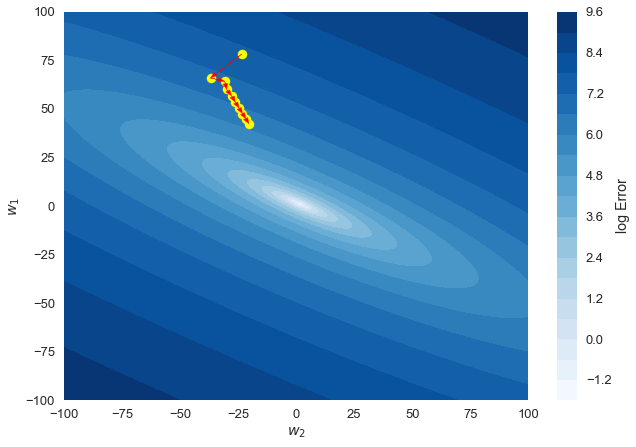

In [18]:
gradient_descent(x1, t)
plt.show()

## Train and test set
In order to assess the generalization performance (the accuracy of the algorith with new unseen data) the available data has to be separated in training and test set: training, i.e. parameter estimation, is done with the training set, while generalization performance is evaluated on the test set.
In order to avoid possible bias in training and test due to subsampling of the dataset, k-fold cross-validation can be used instead of just separating the dataset in two subsets.

### k-fold cross-validation
The whole dataset is divided in $k$ subsets of equal size with elements randomly assigned to each subsets.
Training is done using $k-1$ subsets and test with one subset. The procedure is repeated $k$ times changing each time the subset used for testing. The mean error over the $k$ repetitions is the best estimate of the generalization error. $k$ is usually chosen to be in the range $[3, 10]$; higher values of $k$ usually provide a too variable estimate of the error (when $k$ is equal to the number of samples in the dataset only one sample is used to asses the test error and the procedure is called <i>leave-one-out</i>).

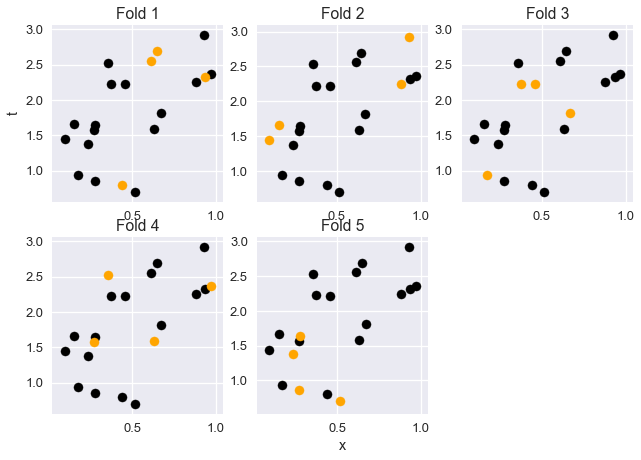

In [20]:
# apply k-fold CV to the synthetic data and represent each fold
k = 5
x_tr, x_te, t_tr, t_te = split_train_test(x, t, k=k)
plt.figure()
rows = int(np.sqrt(k))  # number of rows in the figure
cols = np.ceil(k/int(np.sqrt(k)))  # number of columns in the figure
for i in range(k):
    plt.subplot(rows, cols, i+1)
    plt.scatter(x_tr[i], t_tr[i], color='black')
    plt.scatter(x_te[i], t_te[i], color='orange')
    plt.title('Fold ' + str(i+1))
    if i==0:
        plt.ylabel('t')
    if i==k-1:
        plt.xlabel('x')
plt.show()

## Overfitting
When the model used is too complex (too many parameters, i.e. too many degree of freedom) there is the risk of overfitting. Overfitting consists of low error on the training set and unacceptably high error on the test set, in particular when a lower complexity model achieves higher error on the training set but lower error on the test set.
In the following you can see the error of a linear and non linear (polynomic) model on our linear synthetic dataset.
You can try different degrees of the polinomial model to see how the function approximates each point in the training set and how the errors vary correspondingly.
If you change the dataset increasing the number of samples (running again the cells above), you'll see that for a given model complexity the test error decreases as a function of the number of samples (this happens because the added samples are constraining the non linear model to lie nearer to the linear one).

Linear model: training error: 0.28
		 test error: 0.32
Non linear model: training error: 0.15
		 test error: 64.70


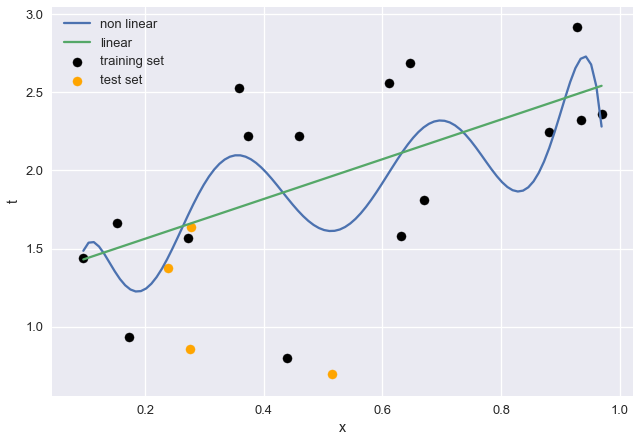

In [22]:
nl_model = supermodel(deg=8)  # create a non linear model
lin_model = supermodel(deg=1)  # create a linear model
E_nl_tr = np.zeros([k])  # inits
E_nl_te = np.zeros([k])
E_lin_tr = np.zeros([k])
E_lin_te = np.zeros([k])
for i in range(k):  # for each fold
    nl_model.fit(x_tr[i], t_tr[i])  # train the models
    lin_model.fit(x_tr[i], t_tr[i])
    E_nl_tr[i] = nl_model.error(x_tr[i], t_tr[i])  # calculate model's error on the training set
    E_nl_te[i] = nl_model.error(x_te[i], t_te[i])  # calculate model's error on the test set
    E_lin_tr[i] = lin_model.error(x_tr[i], t_tr[i])  # calculate model's error on the training set
    E_lin_te[i] = lin_model.error(x_te[i], t_te[i])  # calculate model's error on the test set
print("Linear model: training error: %.2f" % E_lin_tr.mean())
print("\t\t test error: %.2f" % E_lin_te.mean())
print("Non linear model: training error: %.2f" % E_nl_tr.mean())
print("\t\t test error: %.2f" % E_nl_te.mean())
xx = np.linspace(x.min(), x.max(), 100)  # auxiliary variable to plot a smooth function
ynlin = nl_model.predict(xx)  # predict the value of trained models on the auxiliary variable
ylin = lin_model.predict(xx)  # predict the value of trained models on the auxiliary variable
plt.figure()
# show trained models' function for the last fold
plt.scatter(x_tr[k-1], t_tr[k-1], color='black', label='training set')
plt.scatter(x_te[k-1], t_te[k-1], color='orange', label='test set')
plt.plot(xx, ynlin, label='non linear')
plt.plot(xx, ylin, label='linear')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()